In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 18})

print(os.path.abspath("."))
MYDIR = "./../../ResearchProposal/suicide"

myFiles = os.listdir(MYDIR)
print(os.path.abspath(MYDIR))
print()

print(myFiles)

print("Done")

C:\Users\alexg\Dropbox\SIT_PhD\DissertationTopic1\INFORMS2020\python
C:\Users\alexg\Dropbox\SIT_PhD\DissertationTopic1\ResearchProposal\suicide

['multiple_causes_of_death__suicide.csv', 'multiple_causes_of_death__suicide.txt', 'suicide_cdc_data.twb', 'USSuicideRatesByCounty.txt']
Done


In [2]:
myFile = "multiple_causes_of_death__suicide.txt"

myData = pd.read_table(MYDIR + "/" + myFile)
myData.columns=[cc.lower().replace(" ", "_").replace("_-_", "__") for cc in myData.columns]
myData.dropna(subset=["year"], inplace=True)
myData.year = myData.year.astype("int64")
myData.county = [cc.split(" County, ")[0] for cc in myData.county]
myData.head()
myData["county_state"] = myData.county + ", " + myData.state
# myData.ucd__injury_intent.unique()

good_data = myData[myData["crude_rate"] != "Unreliable"].copy()
good_data.crude_rate = good_data.crude_rate.astype("float64")
good_data.age_adjusted_rate = good_data.age_adjusted_rate.astype("float64")
good_data.deaths = good_data.deaths.astype("int64")

good_data

,notes,state,state_code,county,county_code,year,year_code,ucd__injury_intent,ucd__injury_intent_code,deaths,population,crude_rate,crude_rate_lower_95%_confidence_interval,crude_rate_upper_95%_confidence_interval,crude_rate_standard_error,age_adjusted_rate,age_adjusted_rate_lower_95%_confidence_interval,age_adjusted_rate_upper_95%_confidence_interval,age_adjusted_rate_standard_error,county_state
7,NaN,Alabama,1.0,Baldwin,1003.0,2006,2006.0,Suicide,2.0,34,168121.0,20.2,14.0,28.3,3.5,18.3,12.5,25.9,3.2,"Baldwin, Alabama"
8,NaN,Alabama,1.0,Baldwin,1003.0,2007,2007.0,Suicide,2.0,27,172404.0,15.7,10.3,22.8,3.0,16.3,10.6,23.9,3.2,"Baldwin, Alabama"
9,NaN,Alabama,1.0,Baldwin,1003.0,2008,2008.0,Suicide,2.0,29,175827.0,16.5,11.0,23.7,3.1,16.9,11.2,24.4,3.2,"Baldwin, Alabama"
10,NaN,Alabama,1.0,Baldwin,1003.0,2009,2009.0,Suicide,2.0,38,179406.0,21.2,15.0,29.1,3.4,20.0,14.0,27.7,3.3,"Baldwin, Alabama"
11,NaN,Alabama,1.0,Baldwin,1003.0,2010,2010.0,Suicide,2.0,31,182265.0,17.0,11.6,24.1,3.1,16.6,11.1,23.9,3.1,"Baldwin, Alabama"
12,NaN,Alabama,1.0,Baldwin,1003.0,2011,2011.0,Suicide,2.0,34,186717.0,18.2,12.6,25.4,3.1,16.7,11.4,23.6,2.9,"Baldwin, Alabama"
13,NaN,Alabama,1.0,Baldwin,1003.0,2012,2012.0,Suicide,2.0,45,190790.0,23.6,17.2,31.6,3.5,22.5,16.2,30.4,3.5,"Baldwin, Alabama"
14,NaN,Alabama,1.0,Baldwin,1003.0,2013,2013.0,Suicide,2.0,37,195540.0,18.9,13.3,26.1,3.1,19.1,13.3,26.6,3.2,"Baldwin, Alabama"
15,NaN,Alabama,1.0,Baldwin,1003.0,2014,2014.0,Suicide,2.0,38,200111.0,19.0,13.4,26.1,3.1,18.5,12.9,25.7,3.1,"Baldwin, Alabama"
16,NaN,Alabama,1.0,Baldwin,1003.0,2015,2015.0,Suicide,2.0,45,203709.0,22.1,16.1,29.6,3.3,21.8,15.7,29.4,3.3,"Baldwin, Alabama"


In [3]:
"""
Get the useful columns; compute p95 for crude and age adjusted rates (assuming normal distribution)
"""
scDF = good_data[["state", "county", "county_state", "year", 
                  "deaths", "population", "crude_rate", "age_adjusted_rate",
                  "crude_rate_upper_95%_confidence_interval", "age_adjusted_rate_upper_95%_confidence_interval",
                  "crude_rate_standard_error", "age_adjusted_rate_standard_error"]].copy()

scDF["crude_rate_p95"] = scDF.crude_rate + 1.96 * scDF.crude_rate_standard_error
scDF["age_adjusted_rate_p95"] = scDF.age_adjusted_rate + 1.96 * scDF.age_adjusted_rate_standard_error
scDF["death_rate"] = \
    1e+05 * scDF["deaths"].astype("float64") /\
    scDF["population"]
    
scDF.head()

,state,county,county_state,year,deaths,population,crude_rate,age_adjusted_rate,crude_rate_upper_95%_confidence_interval,age_adjusted_rate_upper_95%_confidence_interval,crude_rate_standard_error,age_adjusted_rate_standard_error,crude_rate_p95,age_adjusted_rate_p95,death_rate
7,Alabama,Baldwin,"Baldwin, Alabama",2006,34,168121.0,20.2,18.3,28.3,25.9,3.5,3.2,27.060,24.572,20.223529
8,Alabama,Baldwin,"Baldwin, Alabama",2007,27,172404.0,15.7,16.3,22.8,23.9,3.0,3.2,21.580,22.572,15.660890
9,Alabama,Baldwin,"Baldwin, Alabama",2008,29,175827.0,16.5,16.9,23.7,24.4,3.1,3.2,22.576,23.172,16.493485
10,Alabama,Baldwin,"Baldwin, Alabama",2009,38,179406.0,21.2,20.0,29.1,27.7,3.4,3.3,27.864,26.468,21.181008
11,Alabama,Baldwin,"Baldwin, Alabama",2010,31,182265.0,17.0,16.6,24.1,23.9,3.1,3.1,23.076,22.676,17.008202


Plotting the histograms of suicide attempt rate distribution across counties by year

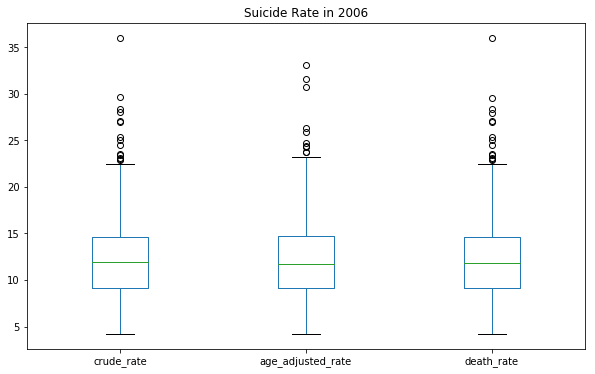

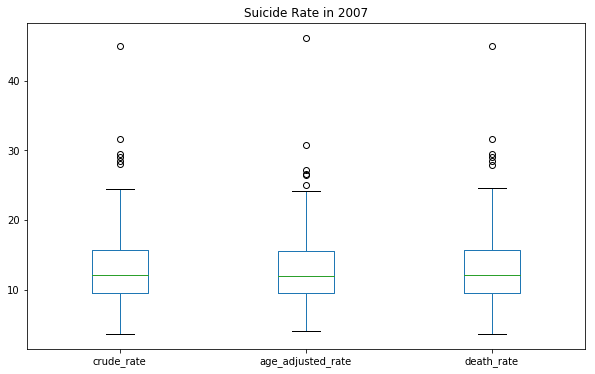

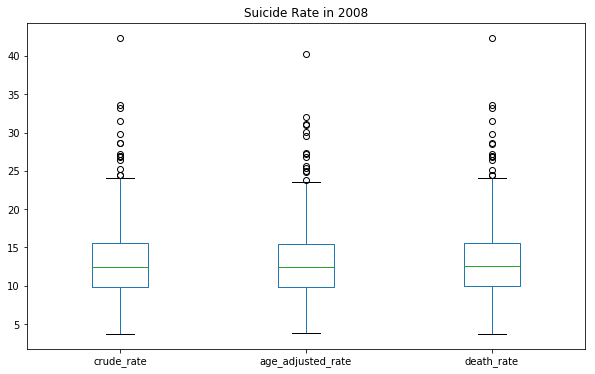

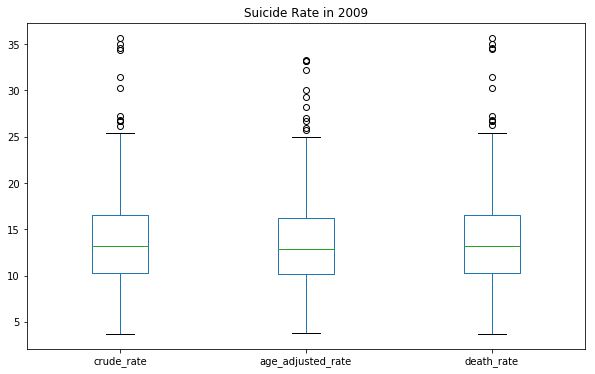

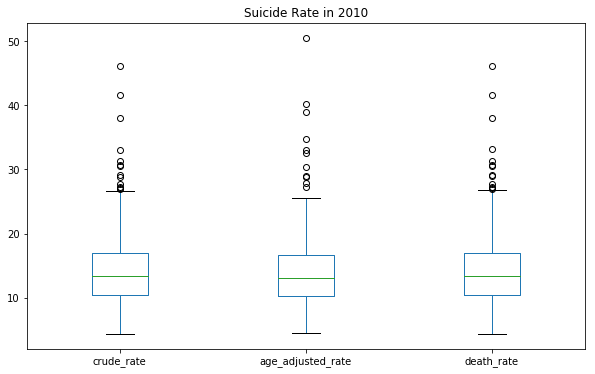

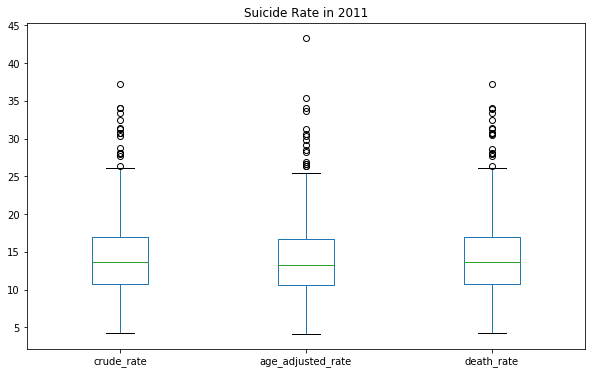

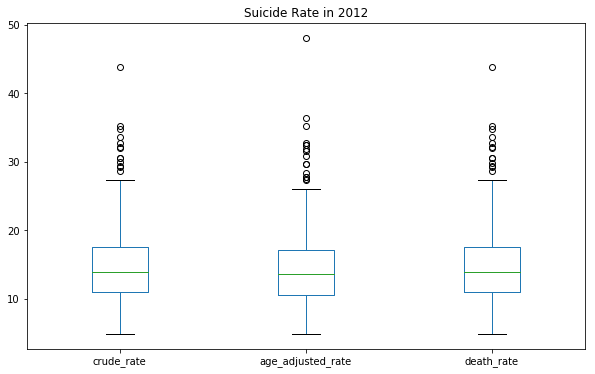

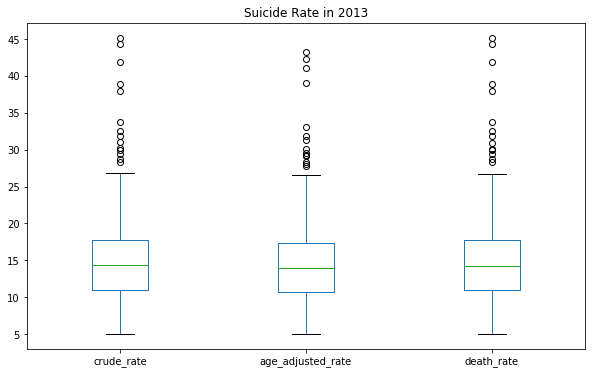

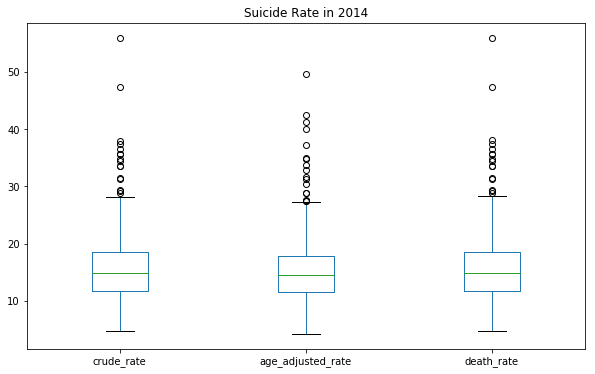

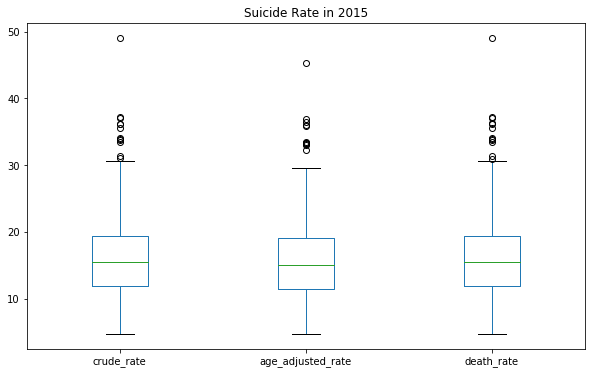

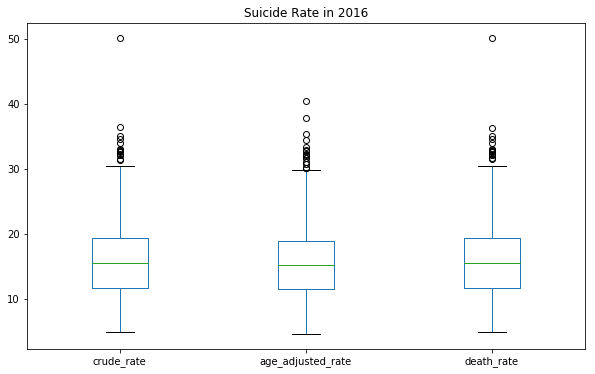

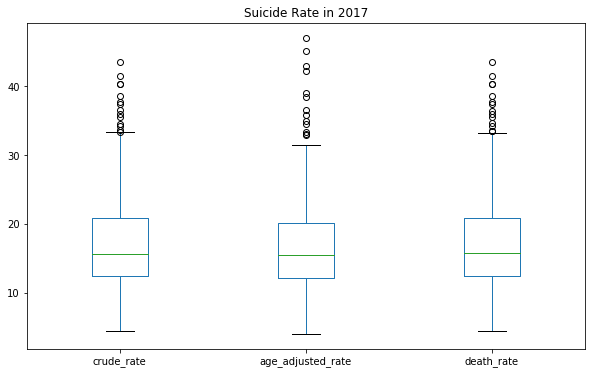

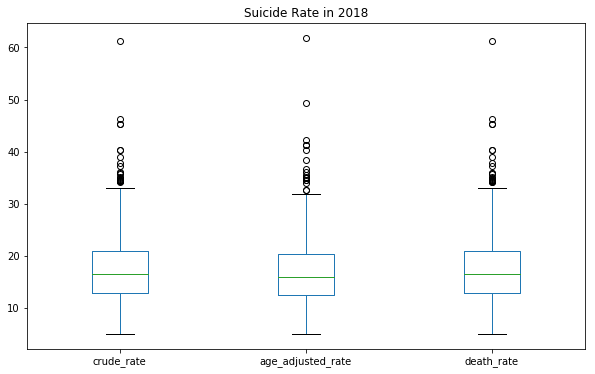

In [4]:
for yy in sorted(scDF.year.unique()):
    yyDF = scDF[scDF.year == yy].copy()
    ax = yyDF[["crude_rate", "age_adjusted_rate", "death_rate"]].plot.box(figsize=(10, 6))
    ax.set_title("Suicide Rate in " + str(yy))
plt.show()

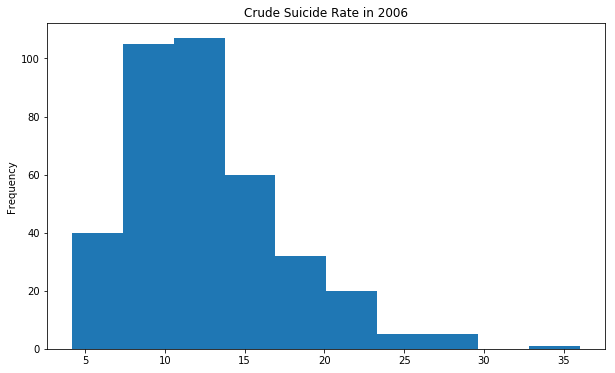

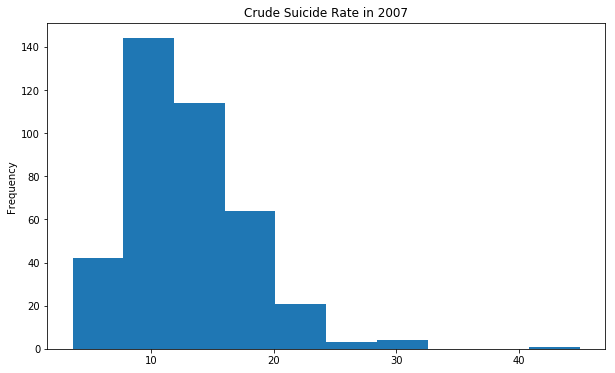

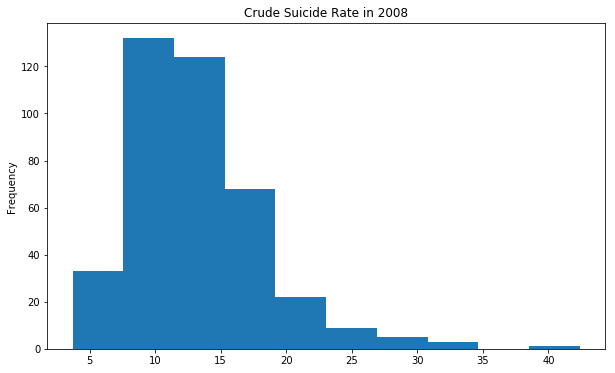

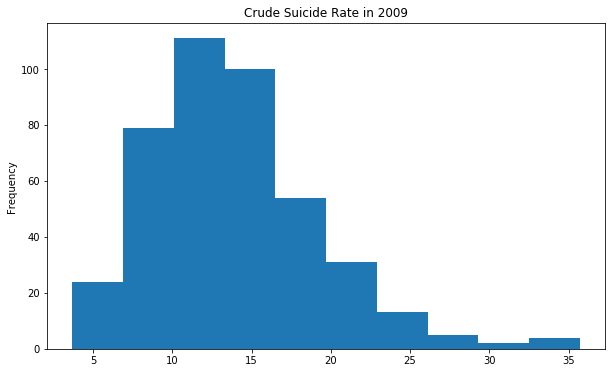

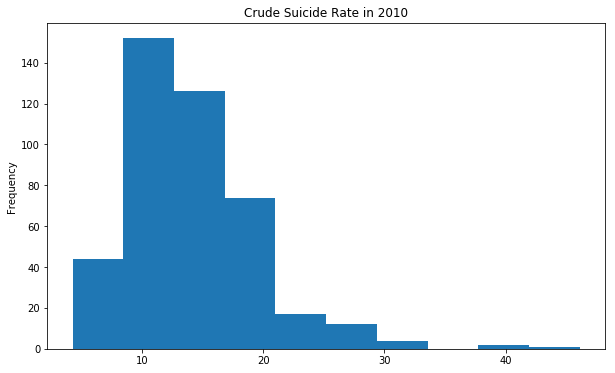

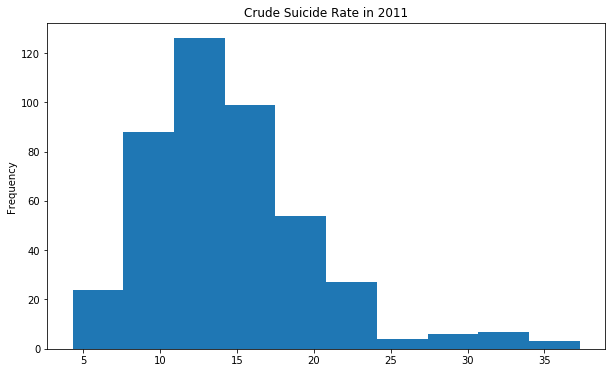

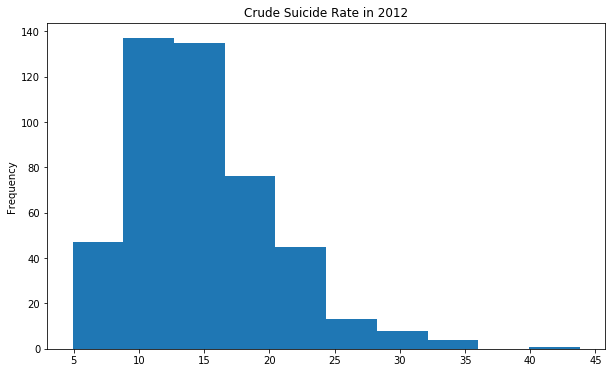

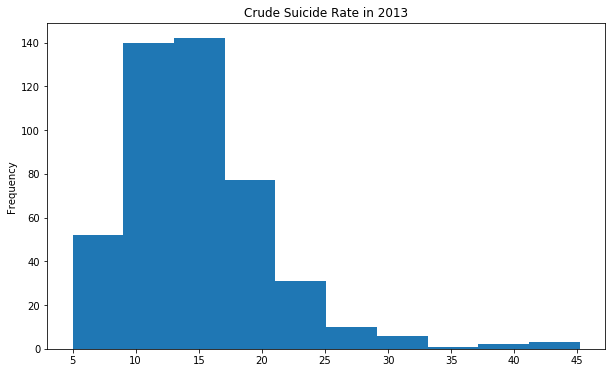

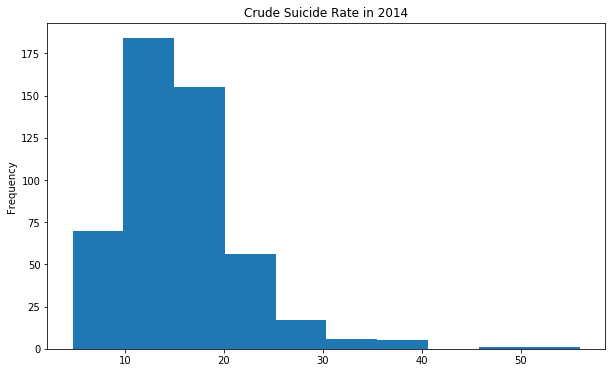

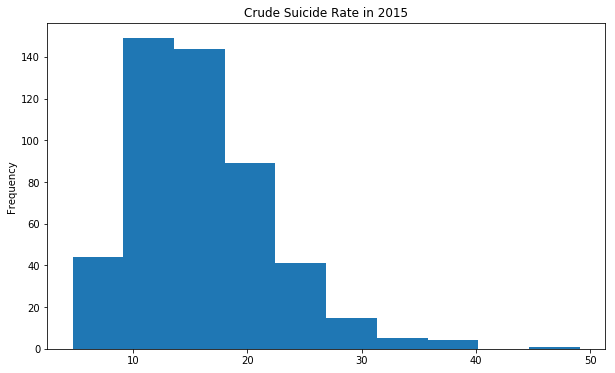

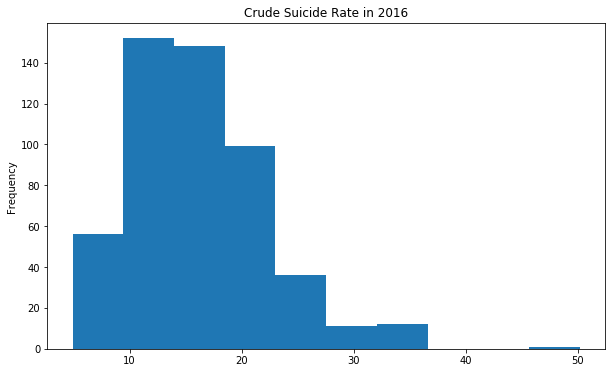

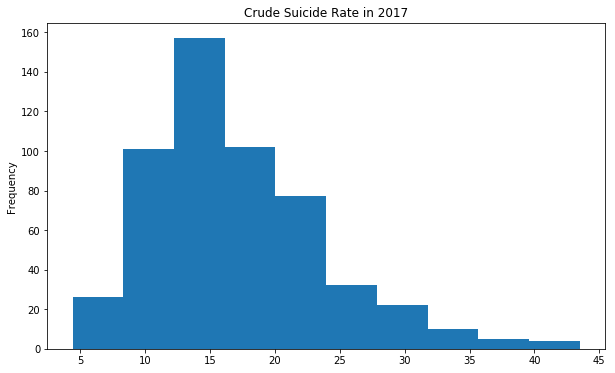

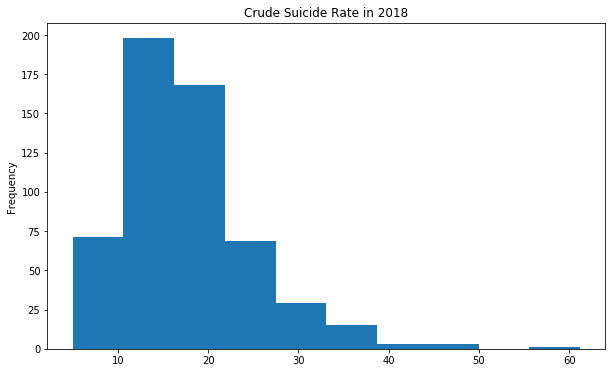

In [5]:
"""
Crude Rate by county_state:
"""
for yy in sorted(scDF.year.unique()):
    yyDF = scDF[scDF.year == yy].copy()
    ax = yyDF.crude_rate.plot.hist(figsize=(10, 6))
    ax.set_title("Crude Suicide Rate in " + str(yy))
    plt.show()

2006


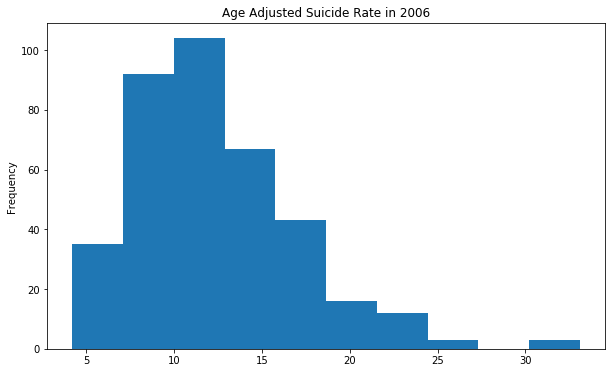

count    375.000000
mean      12.390933
std        4.669262
min        4.200000
25%        9.100000
50%       11.700000
75%       14.750000
max       33.100000
Name: age_adjusted_rate, dtype: float64
skew =  0.07965
CoV =  0.37683
2007


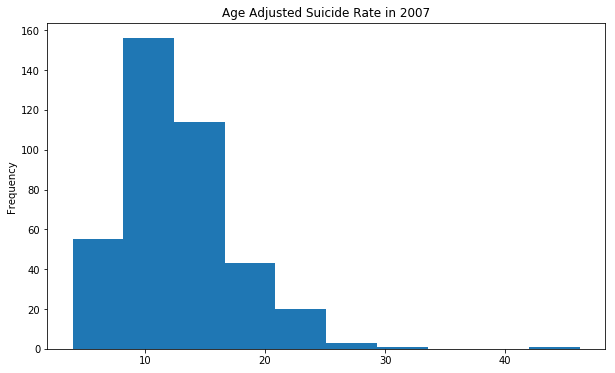

count    393.000000
mean      12.753435
std        4.740624
min        4.000000
25%        9.500000
50%       12.000000
75%       15.500000
max       46.200000
Name: age_adjusted_rate, dtype: float64
skew =  0.16667
CoV =  0.37171
2008


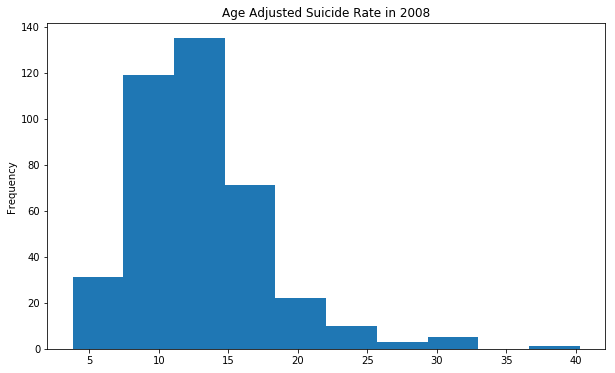

count    397.000000
mean      13.040302
std        4.827838
min        3.800000
25%        9.900000
50%       12.400000
75%       15.400000
max       40.300000
Name: age_adjusted_rate, dtype: float64
skew =  0.09091
CoV =  0.37022
2009


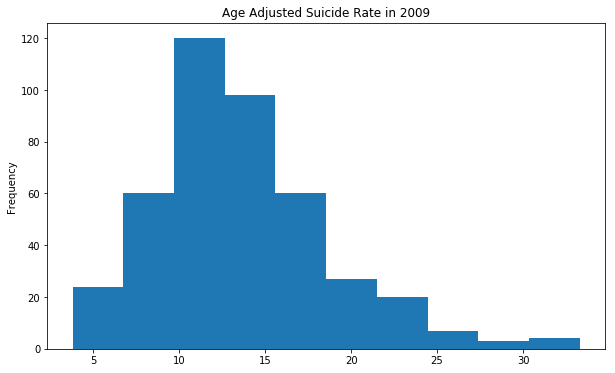

count    423.000000
mean      13.674468
std        5.103991
min        3.800000
25%       10.200000
50%       12.900000
75%       16.250000
max       33.300000
Name: age_adjusted_rate, dtype: float64
skew =  0.10744
CoV =  0.37325
2010


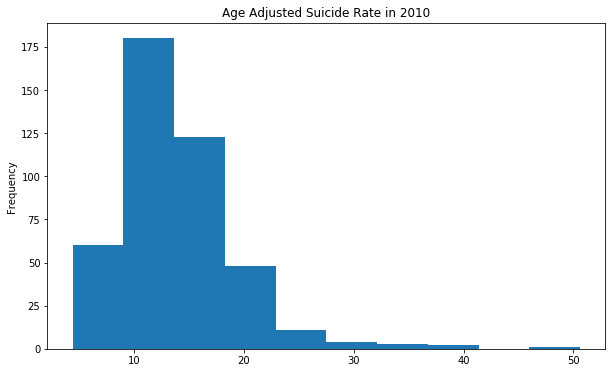

count    432.000000
mean      13.898611
std        5.439846
min        4.400000
25%       10.300000
50%       13.000000
75%       16.600000
max       50.600000
Name: age_adjusted_rate, dtype: float64
skew =  0.14286
CoV =  0.39139
2011


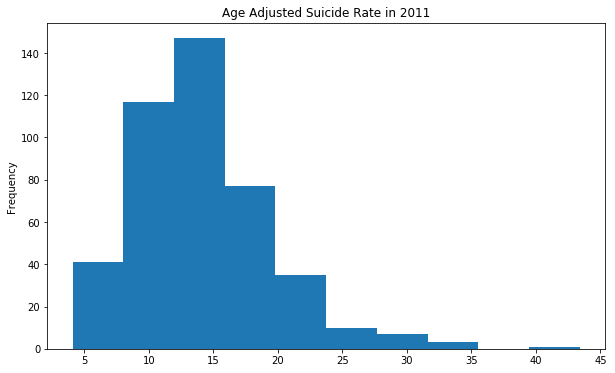

count    438.000000
mean      14.178539
std        5.351318
min        4.100000
25%       10.625000
50%       13.200000
75%       16.675000
max       43.400000
Name: age_adjusted_rate, dtype: float64
skew =  0.14876
CoV =  0.37742
2012


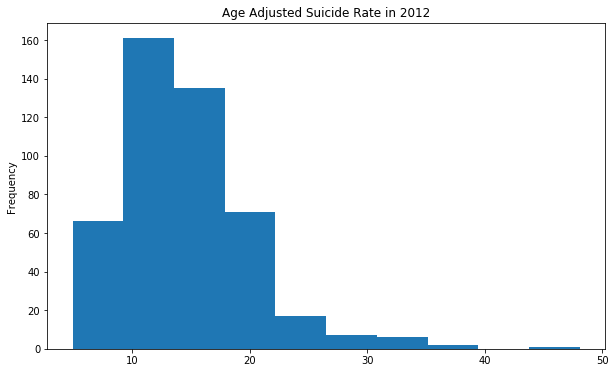

count    466.000000
mean      14.511588
std        5.565114
min        4.900000
25%       10.600000
50%       13.700000
75%       17.200000
max       48.100000
Name: age_adjusted_rate, dtype: float64
skew =  0.06061
CoV =  0.38349
2013


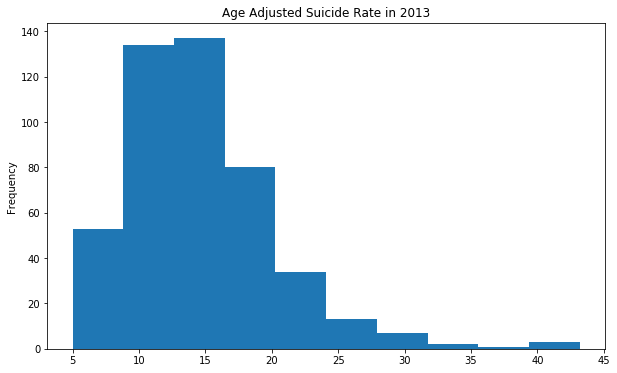

count    464.000000
mean      14.568103
std        5.594738
min        5.000000
25%       10.700000
50%       13.900000
75%       17.300000
max       43.200000
Name: age_adjusted_rate, dtype: float64
skew =  0.03030
CoV =  0.38404
2014


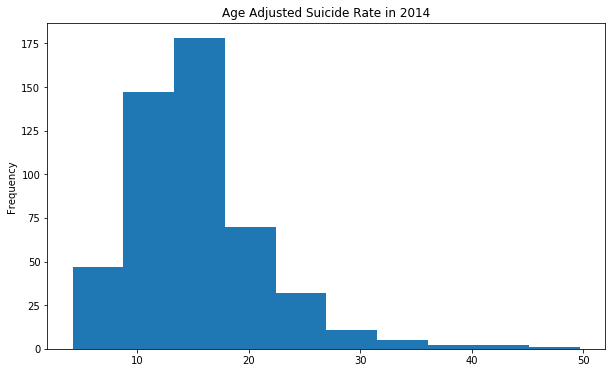

count    495.000000
mean      15.290101
std        5.919692
min        4.200000
25%       11.500000
50%       14.600000
75%       17.800000
max       49.700000
Name: age_adjusted_rate, dtype: float64
skew =  0.01587
CoV =  0.38716
2015


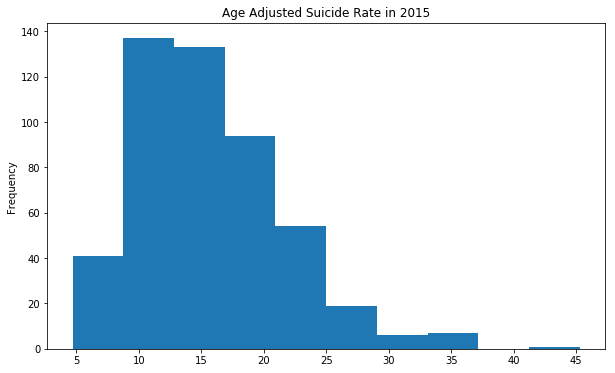

count    492.000000
mean      15.747358
std        5.986619
min        4.700000
25%       11.475000
50%       15.000000
75%       19.025000
max       45.300000
Name: age_adjusted_rate, dtype: float64
skew =  0.06623
CoV =  0.38017
2016


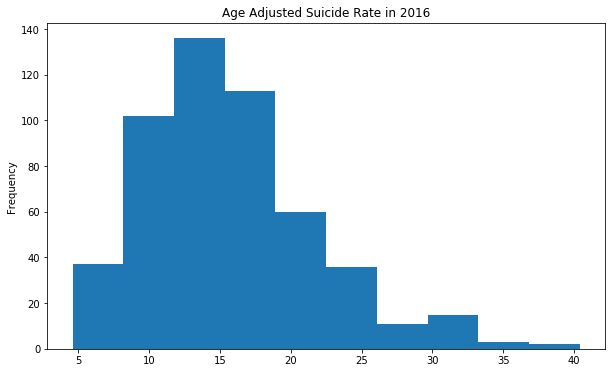

count    515.000000
mean      15.775340
std        5.978196
min        4.600000
25%       11.500000
50%       15.200000
75%       18.900000
max       40.400000
Name: age_adjusted_rate, dtype: float64
skew =  0.00000
CoV =  0.37896
2017


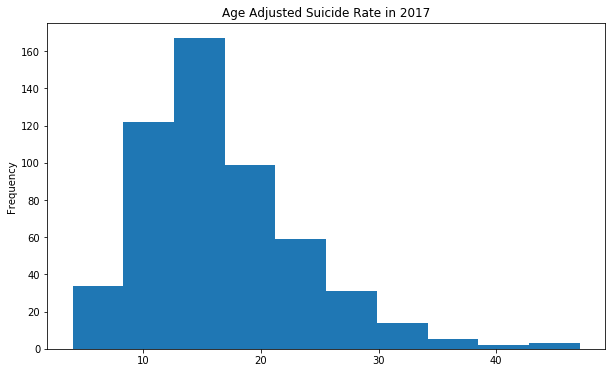

count    536.000000
mean      16.706157
std        6.607361
min        4.000000
25%       12.200000
50%       15.500000
75%       20.125000
max       47.100000
Name: age_adjusted_rate, dtype: float64
skew =  0.16719
CoV =  0.39550
2018


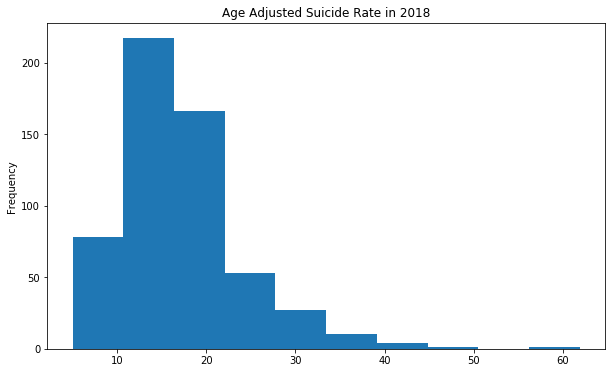

count    557.000000
mean      17.080251
std        6.909115
min        5.000000
25%       12.400000
50%       15.900000
75%       20.300000
max       61.900000
Name: age_adjusted_rate, dtype: float64
skew =  0.11392
CoV =  0.40451


In [6]:
"""
Age Adjusted Rate by county_state:
"""
yyDFht = {} # Dict[str: pd.DataFrame]
for yy in sorted(scDF.year.unique()):
    print(yy)
    yyDF = scDF[scDF.year == yy].copy()
    ax = yyDF.age_adjusted_rate.plot.hist(figsize=(10, 6))
    ax.set_title("Age Adjusted Suicide Rate in " + str(yy))
    plt.show()
    
    smmry = yyDF.age_adjusted_rate.describe()
    print(smmry)
    skew = (smmry["75%"] + smmry["25%"] - 2.0 * smmry["50%"]) / (smmry["75%"] - smmry["25%"])
    print(f"""skew = {skew: .5f}""")
    
    cov = smmry["std"]/smmry["mean"]
    print(f"""CoV = {cov: .5f}""")
    
    yyDF["skew_year"] = skew
    yyDF["cov_year"] = cov
    
    yyDFht[yy] = yyDF.copy()

In [7]:
scDF = pd.concat(yyDFht).reset_index(drop=True, inplace=False)

Save the data to CSV

In [8]:
myCSV = MYDIR + "/" + myFile.replace(".txt", ".csv")
scDF.to_csv(myCSV, index=False)
print(f"""Saved the suicide attempt data to {myCSV}""")

Saved the suicide attempt data to ./../../ResearchProposal/suicide/multiple_causes_of_death__suicide.csv
